**The Notebook was created by Lisandro Torres**

In [ ]:
###### Set Up #####
# verify our folder with the data and module assets is installed
# if it is installed make sure it is the latest
!test -e ds-assets && cd ds-assets && git pull && cd ..
# if it is not installed clone it 
!test ! -e ds-assets && git clone https://github.com/IndraniMandal/ds-assets.git
# point to the folder with the assets
home = "ds-assets/assets/" 
import sys
sys.path.append(home)      # add home folder to module search path

Cloning into 'ds-assets'...
remote: Enumerating objects: 176, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 176 (delta 3), reused 2 (delta 0), pack-reused 164
Receiving objects: 100% (176/176), 9.35 MiB | 13.45 MiB/s, done.
Resolving deltas: 100% (63/63), done.


##Importing Modules/Libaries


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
data_to_load = files.upload()
import io

Saving penguins.csv to penguins (1).csv


The data set was obtained from https://vincentarelbundock.github.io/Rdatasets/datasets titled palmerpenguin, but it didn't include the person or people who collected it

In [ ]:
file_name = "penguins.csv"

penguin_df = pd.read_csv(io.BytesIO(data_to_load[file_name]))

#Penguin DF Data Summary

In [ ]:
penguin_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
print("All the columns with penguin df are: \n")
penguin_df.columns

All the columns with penguin df are: 



Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
rows, cols = penguin_df.shape
print("The total number of rows is {} and the total number of columns is {}".format(rows, cols))

The total number of rows is 344 and the total number of columns is 7


##The type of data type for each columns

In [ ]:
penguin_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [ ]:
mode = penguin_df.mode(axis=0)
mode = mode.dropna()
mode

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,MALE


In [ ]:
penguin_df.mean()

<ipython-input-9-76514867aed7>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  penguin_df.mean()


bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

In [ ]:
penguin_df.max()

<ipython-input-10-a9bf8eba4eed>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  penguin_df.max()


species                 Gentoo
island               Torgersen
bill_length_mm            59.6
bill_depth_mm             21.5
flipper_length_mm        231.0
body_mass_g             6300.0
dtype: object

In [ ]:
penguin_df.min()

<ipython-input-11-be91e04df53d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  penguin_df.min()


species              Adelie
island               Biscoe
bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
dtype: object

In [ ]:
penguin_df.isnull()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


#Calculatuing the null values for each columns

In [ ]:
s = penguin_df.species
i = penguin_df.island
cl = penguin_df.bill_length_mm
cd = penguin_df.bill_depth_mm
fl = penguin_df.flipper_length_mm
bm = penguin_df.body_mass_g
sx = penguin_df.sex
s_nullSum = s.isnull().values.sum()
i_nullSum = i.isnull().values.sum()
cl_nullSum = cl.isnull().values.sum()
cd_nullSum = cd.isnull().values.sum()
fl_nullSum = fl.isnull().values.sum()
bm_nullSum = bm.isnull().values.sum()
sx_nullSum = sx.isnull().values.sum()
print("species has ", s_nullSum, "missing values")
print("island has ", i_nullSum ,"missing values")
print("culmen_length has ", cl_nullSum ,"missing values")
print("culmen_depth has ", cd_nullSum ,"missing values")
print("flipper_length has ", fl_nullSum ,"missing values")
print("body_mass has ", bm_nullSum ,"missing values")
print("sex has ", sx_nullSum ,"missing values")

species has  0 missing values
island has  0 missing values
culmen_length has  2 missing values
culmen_depth has  2 missing values
flipper_length has  2 missing values
body_mass has  2 missing values
sex has  11 missing values


My dataset has very few missing values. There are three possible target columns that I can use. The species dataset is not the most balanced but would still be acceptible for our data manipulation. Island is even worse and sex is better but for this case I will be using species as our target.

#Data Cleaning

In [ ]:
df = penguin_df.dropna()

In [ ]:
df.drop(['island'], axis=1, inplace=True)
df.drop(['sex'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


The rows and columns df after droping the nan values

In [ ]:
df.shape

(333, 5)

#Printing the first six rows from the data frame to visualize the features and other important data

In [ ]:
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0


#**ML Models**

#Visualizations

###The bar graph is a categorical data set that count the total amount of penguins in for the species

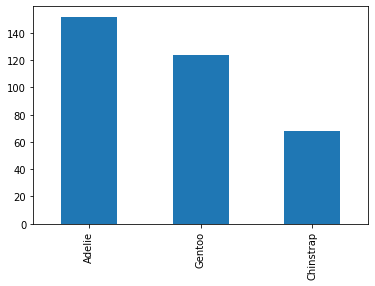

In [ ]:
penguin_df['species'].value_counts().plot(kind='bar')

Our species column is not the most balanced because we have more than twice as much of the Adelie species to the Chinstrap species but despite this we still used this as the categorical column for our decisions tree.

###The bar graph is a categorical data set that count the total amount of penguins in for the species

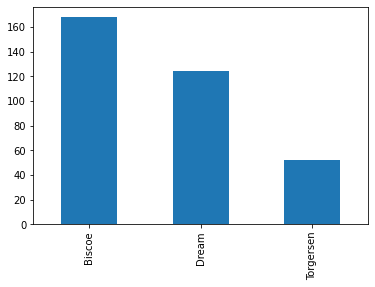

In [ ]:
penguin_df['island'].value_counts().plot(kind='bar')

Our island columns is pretty similar in balance to our species column.

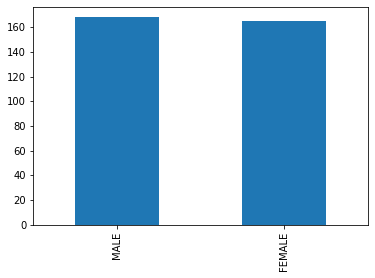

In [ ]:
penguin_df['sex'].value_counts().plot(kind='bar')

Our sex column is very balanced with FEMALE having slightly more categorizations

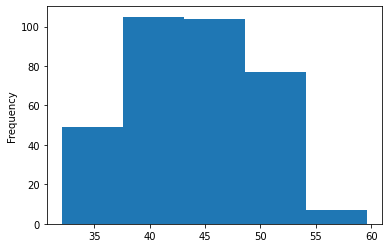

In [ ]:
penguin_df['bill_length_mm'].plot.hist(bins=5)

Unimodal graph representing how many counts there are for bill_length in their respective ranges.

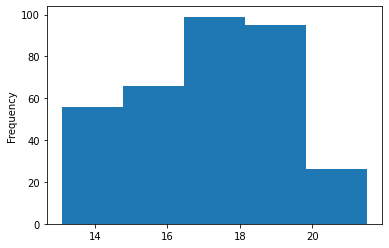

In [ ]:
penguin_df['bill_depth_mm'].plot.hist(bins=5)

Unimodal graph representing how many counts there are for bill_depth in their respective ranges.

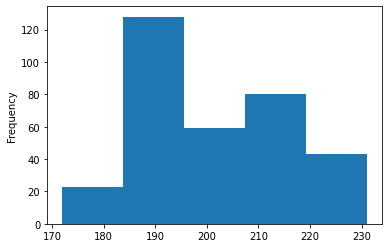

In [ ]:
df['flipper_length_mm'].plot.hist(bins=5)

Multimodal graph representing how many counts there are for flipper_length in their respective ranges. This is the only bar graph that is multimodal

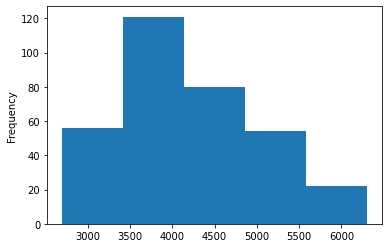

In [ ]:
df['body_mass_g'].plot.hist(bins=5)

Unimodal graph representing how many counts there are for body_mass in their respective ranges.

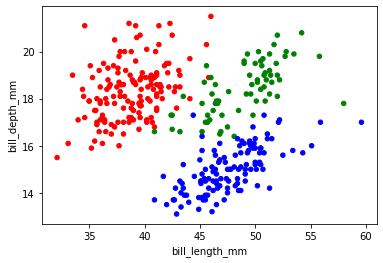

In [ ]:
def fn_color(x):
  if x == 'Adelie':
    return 'red'
  elif x == 'Gentoo':
    return 'blue'
  else: # Chinstrap
    return 'green'

color_vector = df['species'].map(fn_color)

df.plot.scatter(x='bill_length_mm', y='bill_depth_mm',c=color_vector)

The scatterplot

In [ ]:
shrink_df = df[['bill_length_mm','bill_depth_mm','species']]

In [ ]:
adelie_df = shrink_df[shrink_df.species == 'Adelie']
chinstrap_df = shrink_df[shrink_df.species == 'Chinstrap']
gentoo_df = shrink_df[shrink_df.species == 'Gentoo']

In [ ]:
import matplotlib.pyplot as plt

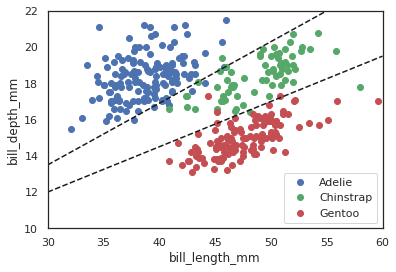

In [ ]:
# scatter plot of the data
plt.plot(adelie_df['bill_length_mm'],adelie_df['bill_depth_mm'],'bo')
plt.plot(chinstrap_df['bill_length_mm'],chinstrap_df['bill_depth_mm'],'go')
plt.plot(gentoo_df['bill_length_mm'],gentoo_df['bill_depth_mm'],'ro')
plt.axis([30, 60, 10, 22])
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.legend(['Adelie','Chinstrap','Gentoo'])

# plotting the tree decision surfaces
plt.plot([30,55],[13.5,22],'k--')
plt.plot([30,60],[12,19.5], 'k--')

The bar plots are mostly unimodal except for the flipper length and I was able to find a trend to divide the graph into sections based on where each of the dot types were located on the graph

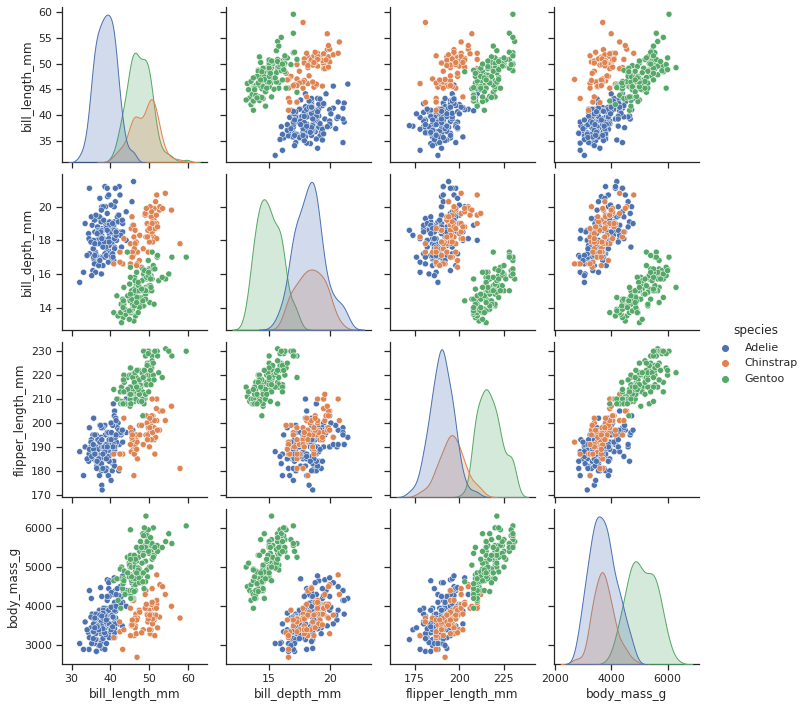

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df, hue="species")

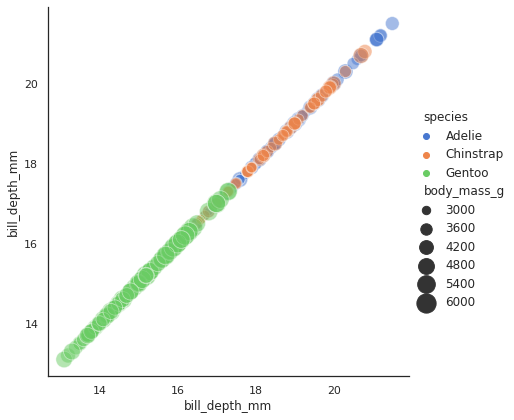

In [ ]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="bill_depth_mm", y="bill_depth_mm", hue="species", size="body_mass_g",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

Creating a heat map of the penguins by calculating the body mass and the depth of the penguin

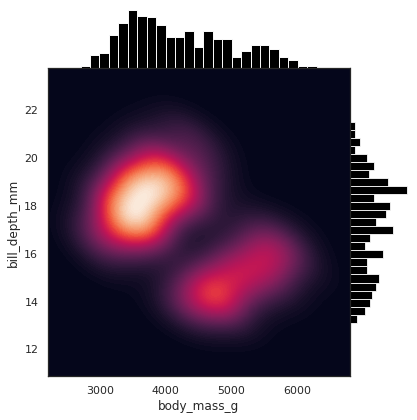

In [ ]:
import seaborn as sns
sns.set_theme(style="white")


g = sns.JointGrid(data=df, x="body_mass_g", y="bill_depth_mm", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#000", alpha=1, bins=25)

#Decision Tree




> Importing Modules/Libaries





In [ ]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

     |████████████████████████████████| 72 kB 866 kB/s 


In [ ]:
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
import pandas as pd

##Obtaining the features and target, the features are descriptions of how the penguins is, and the target is how you going to classify the penguin. In this case the penguins are been classified by race

In [ ]:
target_df = pd.DataFrame(df['species'])
target_df['species'].replace(["Adelie", "Chinstrap", "Gentoo"], [1,2,3], inplace=True)

In [ ]:
import numpy as np
target_df= target_df.to_numpy()
target_df= target_df.flatten()

Droping the species column from the features at this the target that we want to classified by the species

In [ ]:
features_df = df.drop(['species'],axis=1)# features

In [ ]:
target_df


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

Building a decision tree with the criterion been entropy or the amount of randomness

In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(features_df,target_df)

DecisionTreeClassifier(criterion='entropy')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


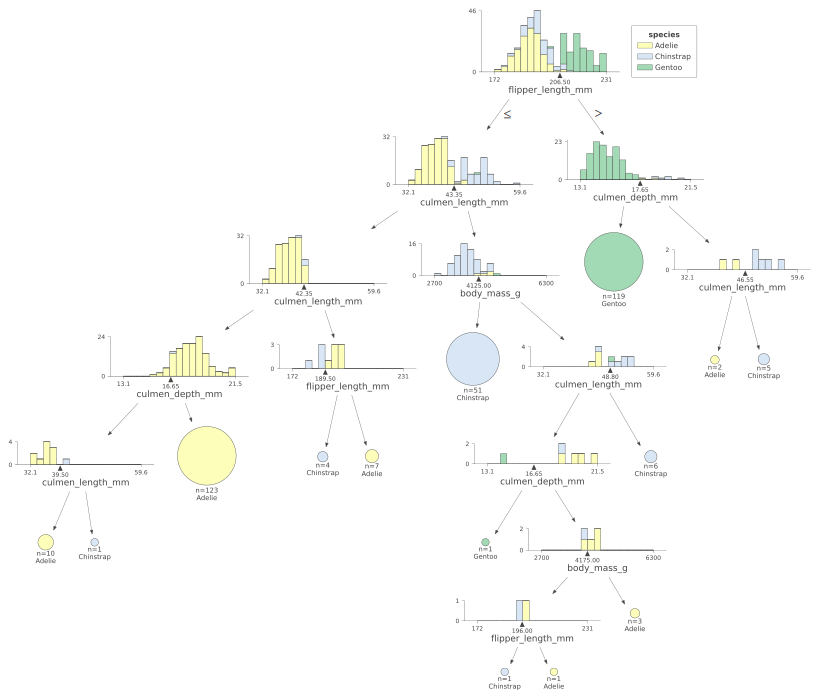

In [ ]:
viz = dtreeviz(dtree, # The model we have just created
               features_df, # Training featues(dataframe)
               target_df,  # Target(1D numpy array)
               target_name='species',
               feature_names= features_df.columns, # Name of the features
               class_names= ["Adelie", "Chinstrap", "Gentoo"] # need class_names for classifier
              )  
viz

We can see that the main decision that is taking place is the first one which is the flipper length.

In [ ]:
from sklearn import tree
from treeviz import tree_print
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
predicted_labels = dtree.predict(features_df)  #predicts a label for the features 

#Test for accuracy
print("Our model accuracy is: {}".format(accuracy_score(target_df, predicted_labels
                                                        )))

Our model accuracy is: 1.0


In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(features_df,target_df)
tree_print(dtree,features_df)

if flipper_length_mm =< 206.5: 
  |then if culmen_length_mm =< 43.35000038146973: 
  |  |then if culmen_length_mm =< 42.35000038146973: 
  |  |  |then if culmen_depth_mm =< 16.65000057220459: 
  |  |  |  |then if culmen_length_mm =< 39.5: 
  |  |  |  |  |then 1
  |  |  |  |  |else 2
  |  |  |  |else 1
  |  |  |else if culmen_depth_mm =< 17.449999809265137: 
  |  |  |  |then 2
  |  |  |  |else 1
  |  |else if body_mass_g =< 4125.0: 
  |  |  |then 2
  |  |  |else if culmen_length_mm =< 48.80000114440918: 
  |  |  |  |then if culmen_length_mm =< 47.20000076293945: 
  |  |  |  |  |then if body_mass_g =< 4175.0: 
  |  |  |  |  |  |then if flipper_length_mm =< 196.0: 
  |  |  |  |  |  |  |then 2
  |  |  |  |  |  |  |else 1
  |  |  |  |  |  |else 1
  |  |  |  |  |else 3
  |  |  |  |else 2
  |else if culmen_depth_mm =< 17.649999618530273: 
  |  |then 3
  |  |else if culmen_length_mm =< 46.54999923706055: 
  |  |  |then 1
  |  |  |else 2
<------------------->
Tree Depth:  7


In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2,random_state=4)
dtree.fit(features_df,target_df)
tree_print(dtree,features_df)

if flipper_length_mm =< 206.5: 
  |then if culmen_length_mm =< 43.35000038146973: 
  |  |then 1
  |  |else 2
  |else if culmen_depth_mm =< 17.649999618530273: 
  |  |then 3
  |  |else 2
<---->
Tree Depth:  2


In [ ]:
predict_array = dtree.predict(features_df)      # produces an array of labels
predicted_labels = pd.DataFrame(predict_array)  # turn it into a DF
predicted_labels.columns = ['Species']          # name the column - same name as in target!
print("Our model accuracy is: {}".format(accuracy_score(target_df, predicted_labels)))

Our model accuracy is: 0.9640718562874252


The accurracy rate of the decision tree had an significant high accuracy of 96.4 percent

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


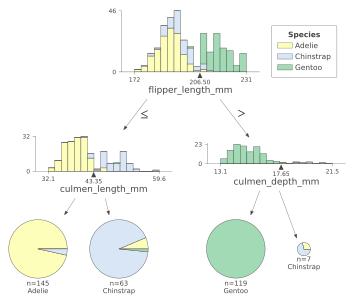

In [ ]:
viz2 = dtreeviz(dtree, # The model we have just created
               features_df, # Training featues(dataframe)
               target_df,  # Target(1D numpy array)
               target_name='Species',
               feature_names= features_df.columns, # Name of the features
               class_names= ["Adelie", "Chinstrap", "Gentoo"] # need class_names for classifier
              )  
viz2

Looking at the bar graphs that are created by the decision trees, we can see that the different types of data are stacked on top of each other causing for a lot of different decisions to be made. This is part of why the depth of the unrestricted graph is seven. When I was restricting the second graph I experimented between the accuracies of one and two. Since the accuracy of the first decision tree was 100% I had to create a restricted decision tree that was at least 90% for the sake of this assignment. I tested the accuracy with a tree of depth of one but it gave me an accuracy that was below 80%. When I tested it with two it gave me an accuracy that was over 90% so I knew what the depth of the restricted decision tree needed to be. When I printed the restricted tree, it was much more readable than the unrestricted tree because there weren't as many decisions that were taking place. All it was comparing in the second model was flipper length at a threshold and if it was less than that threshold the next comparison would be culmen length, but if it was more than the flipper length threshold then it would compare a threshold for culmen depth. 

#Cross-Validation, Confusion Matrices, and Confidence Intervals

In [ ]:
!apt-get -qq install -y graphviz && pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
try:
    from google.colab import drive
    import sys
    
    drive.mount('/content/drive')
    notes_home = "/content/drive/My Drive/CSC310/notes/"
    user_home = "/content/drive/My Drive/"
    
    sys.path.insert(1,notes_home) # let the notebook access the notes folder

except ModuleNotFoundError:
    notes_home = "" # running native Jupyter environment -- notes home is the same as the notebook
    user_home = ""  # under Jupyter we assume the user directory is the same as the notebook

Mounted at /content/drive


In [ ]:
from assets.treeviz import tree_print
from sklearn import tree
from sklearn.metrics import accuracy_score
# sklearn provides manipulation of training sets
# here we do train/test split
from sklearn.model_selection import train_test_split

In [ ]:
X  = df.drop(['species'],axis=1)
y = df['species']

# split the data - 70% training 30% testing
datasets = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=2)
X_train, X_test, y_train, y_test = datasets

In [ ]:
import pandas as pd
import numpy as np
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})
from sklearn import tree
# grab cross validation code
from sklearn.model_selection import cross_val_score
# set up the model
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)

# do the 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

Fold Accuracies: [0.97 0.94 0.94 0.93 0.95]
Accuracy: 0.95


In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

model = model = tree.DecisionTreeClassifier(random_state=1)
param_grid = {
    'max_depth': list(range(1,11)), # search 1..10
    'criterion': ['entropy', 'gini']
    }
grid = GridSearchCV(model, param_grid, cv=5)

grid.fit(X,y)

print("Best parameters: {}".format(grid.best_params_))

print("Best tree:")
tree_print(grid.best_estimator_,X)
    
predict_y = grid.best_estimator_.predict(X)
acc = accuracy_score(y, predict_y)
     
print("Accuracy: {:3.2f}".format(acc))

Best parameters: {'criterion': 'entropy', 'max_depth': 4}
Best tree:
if flipper_length_mm =< 206.5: 
  |then if culmen_length_mm =< 43.35000038146973: 
  |  |then if culmen_length_mm =< 42.35000038146973: 
  |  |  |then if culmen_depth_mm =< 16.65000057220459: 
  |  |  |  |then Adelie
  |  |  |  |else Adelie
  |  |  |else if flipper_length_mm =< 189.5: 
  |  |  |  |then Chinstrap
  |  |  |  |else Adelie
  |  |else if body_mass_g =< 4125.0: 
  |  |  |then Chinstrap
  |  |  |else if culmen_length_mm =< 48.80000114440918: 
  |  |  |  |then Adelie
  |  |  |  |else Chinstrap
  |else if culmen_depth_mm =< 17.649999618530273: 
  |  |then Gentoo
  |  |else if culmen_depth_mm =< 18.949999809265137: 
  |  |  |then Adelie
  |  |  |else Chinstrap
<---------->
Tree Depth:  4
Accuracy: 0.99


In [ ]:
# compute 95% confidence intervals for classification and regression
# problems

def classification_confint(acc, n):
    '''
    Compute the 95% confidence interval for a classification problem.
      acc -- classification accuracy
      n   -- number of observations used to compute the accuracy
    Returns a tuple (lb,ub)
    '''
    import math
    interval = 1.96*math.sqrt(acc*(1-acc)/n)
    lb = max(0, acc - interval)
    ub = min(1.0, acc + interval)
    return (lb,ub)

def regression_confint(rs_score, n, k):
    '''
    Compute the 95% confidence interval for a regression problem.
      rs_score -- R^2 score
      n        -- number of observations used to compute the R^2 score
      k        -- number of independent variables in dataset
    Returns a tuple (lb,ub)
    Reference:
    https://books.google.com/books?id=gkalyqTMXNEC&pg=PA88#v=onepage&q&f=false
    '''
    import math
    interval = 2*math.sqrt((4*rs_score*(1-rs_score)**2*(n-k-1)**2)/((n**2 - 1)*(n+3)))
    lb = max(0, rs_score - interval)
    ub = min(1.0, rs_score + interval)
    return (lb,ub)
observations = 100
acc = .88
lb,ub = classification_confint(acc,observations)
print('Accuracy: {} ({:3.2f},{:3.2f})'.format(acc,lb, ub))

Accuracy: 0.88 (0.82,0.94)


#KNN & MLP

In [ ]:
df2 = penguin_df.dropna()
df2.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


Removes anything that is not "MALE" or "FEMALE" from the 'sex' column

In [ ]:
df2 = df2[ df2['sex'].str.contains( 'MALE' )==True ]

In [ ]:
df2['sex'].replace(["FEMALE", "MALE"], [0,1], inplace=True)
df2['island'].replace(["Biscoe", "Dream", "Torgersen"], [0,1,2], inplace=True)

******We might have to tweak the hidden layer sizes to match this dataset******

In [ ]:
# set up
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from confint import classification_confint

# get data
df2['sex'].replace(["FEMALE", "MALE"], [0,1], inplace=True)
df2['island'].replace(["Biscoe", "Dream", "Torgersen"], [0,1,2], inplace=True)
X  = df2.drop(['species'],axis=1)
y = df2['species']

# neural network
model = MLPClassifier(max_iter=10000, random_state=1)

# grid search
# We set up a grid search over the architecture and activation functions.
# In the architecture search we limit ourselves to node values that are multiples
# of the number of independent variables in the training data.  Also, we
# limit ourselves to a maximum of two hidden layers.
param_grid = {
    # search over different architectures
    'hidden_layer_sizes': 
      [ 
      (10,), (20,),            # single layer MLP
      (10,10), (20, 10),
      (20,10), (20,20)
      ],
    # search different activation functions
    'activation' : ['relu', 'logistic']   
}

# use 3-fold cross-validation otherwse grid search takes too long
grid = GridSearchCV(model, param_grid, cv=3) 
grid.fit(X, y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# evaluate the best model
best_model = grid.best_estimator_
predict_y = best_model.predict(X)
acc = accuracy_score(y, predict_y)
lb,ub = classification_confint(acc,X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

Grid Search: best parameters: {'activation': 'logistic', 'hidden_layer_sizes': (20,)}
Accuracy: 0.44 (0.39,0.49)


KNN-Classifier

The first model we are utilizing is the K-NN classifier. We are trying to find the optimal model we set up a grid search over the number of neighbors. The model is going to search from 1 to 12.

In [ ]:
# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# format training data for sklean
X  = df.drop(['species'],axis=1)
actual_y = df['species']

In [ ]:
# KNN
model = KNeighborsClassifier()

# grid search
param_grid = {'n_neighbors': list(range(1,12))}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, actual_y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# accuracy of best model with confidence interval
best_model = grid.best_estimator_
predict_y = best_model.predict(X)
acc = accuracy_score(actual_y, predict_y)
lb,ub = classification_confint(acc,X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

# build the confusion matrix
labels = ['Adelie', 'Gentoo', 'Chinstrap']
cm = confusion_matrix(actual_y, predict_y, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Grid Search: best parameters: {'n_neighbors': 1}
Accuracy: 1.00 (1.00,1.00)
Confusion Matrix:
           Adelie  Gentoo  Chinstrap
Adelie        146       0          0
Gentoo          0     120          0
Chinstrap       0       0         68


This dataset is exceptional with a perfect accuracy

Decision Trees

In [ ]:
# decision trees
model = DecisionTreeClassifier(random_state=1)

# grid search
param_grid = {'max_depth': list(range(1,21)), 'criterion': ['entropy','gini'] }
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, actual_y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

best_model = grid.best_estimator_
predict_y = best_model.predict(X)
acc = accuracy_score(actual_y, predict_y)
lb,ub = classification_confint(acc,X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

# build the confusion matrix
labels = ['Adelie', 'Gentoo', 'Chinstrap']
cm = confusion_matrix(actual_y, predict_y, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Grid Search: best parameters: {'criterion': 'entropy', 'max_depth': 4}
Accuracy: 0.99 (0.98,1.00)
Confusion Matrix:
           Adelie  Gentoo  Chinstrap
Adelie        146       0          0
Gentoo          1     119          0
Chinstrap       2       0         66


Although the performance of this decisions tree is also really good at 99, it is not as good as the accuracy that we got when we used the KNN classifier.

#SVM & MLP Model Comparison

In [ ]:
# set up
import pandas as pd
import numpy as np
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

Kernel : Linear

In [ ]:
#get data
X  = df.drop(['species'],axis=1)
actual_y = df['species']


# SVM model
model = SVC(kernel='linear', C=0.001, max_iter=10000)

# do the 5-fold cross validation
scores = cross_val_score(model, X, actual_y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

model.fit(X, actual_y)

# evaluate the best model

predict_y = model.predict(X)
acc = accuracy_score(actual_y, predict_y)

# build the confusion matrix
labels = ['Adelie', 'Gentoo', 'Chinstrap']
cm = confusion_matrix(actual_y, predict_y, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Fold Accuracies: [0.97 0.96 0.93 0.94 0.98]
Accuracy: 0.96
Confusion Matrix:
           Adelie  Gentoo  Chinstrap
Adelie        142       1          3
Gentoo          0     120          0
Chinstrap       4       3         61


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider

The result of Linear Kernel is great at an accuracy of 96%

Kernel : Poly

In [ ]:
#get data
X  = df.drop(['species'],axis=1)
actual_y = df['species']


# SVM model
model = SVC(kernel='poly', C=0.001, max_iter=10000, degree = 4, coef0 = 0.99)

# do the 5-fold cross validation
scores = cross_val_score(model, X, actual_y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

model.fit(X, actual_y)

# evaluate the best model

predict_y = model.predict(X)
acc = accuracy_score(actual_y, predict_y)

# build the confusion matrix
labels = ['Adelie', 'Gentoo', 'Chinstrap']
cm = confusion_matrix(actual_y, predict_y, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Fold Accuracies: [0.67 0.69 0.69 0.66 0.73]
Accuracy: 0.69
Confusion Matrix:
           Adelie  Gentoo  Chinstrap
Adelie        145       1          0
Gentoo         32      88          0
Chinstrap      67       1          0


The result of Kernel Poly did not have a good accuracy score of 69%, so far it is not the best kernel to use

Kernel : RBF

In [ ]:
#get data
X  = df.drop(['species'],axis=1)
actual_y = df['species']


# SVM model
model = SVC(kernel='rbf', C=10000, max_iter=10000, gamma = "scale")

# do the 5-fold cross validation
scores = cross_val_score(model, X, actual_y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

model.fit(X, actual_y)

# evaluate the best model

predict_y = model.predict(X)
acc = accuracy_score(actual_y, predict_y)

# build the confusion matrix
labels = ['Adelie', 'Gentoo', 'Chinstrap']
cm = confusion_matrix(actual_y, predict_y, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Fold Accuracies: [0.97 0.96 0.93 0.96 0.97]
Accuracy: 0.96
Confusion Matrix:
           Adelie  Gentoo  Chinstrap
Adelie        145       1          0
Gentoo          0     120          0
Chinstrap       6       2         60


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


The result of Kernel RBF is great with an accuracy of 96%

Kernel : Sigmoid

In [ ]:
#get data
X  = df.drop(['species'],axis=1)
actual_y = df['species']


# SVM model
model = SVC(kernel='sigmoid', C=0.001, max_iter=10000, coef0= .80)

# do the 5-fold cross validation

scores = cross_val_score(model, X, actual_y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

model.fit(X, actual_y)

# evaluate the best model

predict_y = model.predict(X)
acc = accuracy_score(actual_y, predict_y)

# build the confusion matrix
# the confusion matric need to be fix at the moment as the value of the pareameter are incorrect
labels = ['Adelie', 'Gentoo', 'Chinstrap']
cm = confusion_matrix(actual_y, predict_y, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Fold Accuracies: [0.45 0.43 0.43 0.43 0.44]
Accuracy: 0.44
Confusion Matrix:
           Adelie  Gentoo  Chinstrap
Adelie        146       0          0
Gentoo        120       0          0
Chinstrap      68       0          0


The result of Kernel Sigmoid is not good at all as it only has an accuracy of 44%

Finding the Best Parameters

In [ ]:
#get data
X  = df.drop(['species'],axis=1)
actual_y = df['species']

# SVM model
model = SVC(max_iter=10000)

# grid search
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['poly']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['sigmoid']}
 ]
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, actual_y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# evaluate the best model
best_model = grid.best_estimator_
predict_y = best_model.predict(X)
acc = accuracy_score(actual_y, predict_y)
lb,ub = classification_confint(acc,X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

# build the confusion matrix
#the confusion matrix need to be fix at the moment as the result are all the same for the four models
labels = ['Adelie', 'Gentoo', 'Chinstrap']
cm = confusion_matrix(actual_y, predict_y, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider

Grid Search: best parameters: {'C': 100, 'kernel': 'linear'}
Accuracy: 0.90 (0.86,0.93)
Confusion Matrix:
           Adelie  Gentoo  Chinstrap
Adelie        121       0         25
Gentoo          0     120          0
Chinstrap      10       0         58


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Although Kernel Linear and Kernel RBF had simliar accuracies of 96%, out grid search concluded that Kernel Linear is the best Kernel to use. Which indicate they were a strong linear correleation